# Projeto etapas do processamento do Big Data

o objetivo é realizar um agrupamento de pessoas de acordo com o grupo de risco que se encontra baseado no peso e no colesterol.

Para isso, vamos seguir as etapas do processamento do Big Data

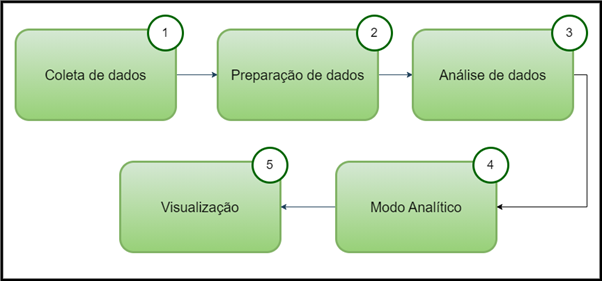


# Coleta dos dados 
Nesta etapa, são definidas as fontes a serem utilizadas para gerar armazenamento, podendo ser bancos de dados SQL, NoSQL, Frameworks e muitas outras fontes. 

Para esse exercício vamos coletar dados já estruturados de dois arquivos. Um arquivo Excel no formato xlxs e outro no formato csv. 

# Coletando dados de estados brasileiros

In [4]:
import pandas as pd # biblioteca de leitura e tratamento de dataframes

# lendo arquivo 
PATH = r'../desafio'
estados = pd.read_csv(PATH + '/estados_brasileiros.csv', sep = ';', encoding='latin-1')


In [5]:
estados.head()

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,Brasil
2,3,Amapá,ap,Brasil
3,4,Amazonas,am,Brasil
4,5,Bahia,ba,Brasil


# Coletando dados de clientes

In [6]:
clientes = pd.read_excel(PATH + '/dados_clientes.xlsx')
clientes.head()

,id_cliente,peso,colesterol,genero,id_estado
0,1,102.0,111,Masculino,23
1,2,115.0,135,Masculino,7
2,3,115.0,136,Masculino,4
3,4,140.0,167,Feminino,24
4,5,130.0,158,Masculino,26


# Coletando dados das idades dos clientes

In [7]:
idade = pd.read_csv(PATH + '/idade_clientes.csv', sep = ';', encoding='latin-1')
idade.head()

,id_cliente,idade
0,1,17
1,2,28
2,3,62
3,4,55
4,5,44


#Preparação dos dados 
É a etapa minuciosa onde os dados são "limpos" e se tornam aptos para a análise. Essa etapa tem o objetivo de reduzir discrepâncias, evitar valores nulos, indicar as anomalias e preencher lacunas. Essas informações, se não tratadas, acabam prejudicando o processo como um todo, já que a análise poderá ser comprometida caso os dados não sejam verdadeiros.

# Analisando as variáveis da base de dados

In [8]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  547 non-null    int64  
 1   peso        542 non-null    float64
 2   colesterol  547 non-null    int64  
 3   genero      547 non-null    object 
 4   id_estado   547 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 21.5+ KB


In [9]:
clientes.describe()

,id_cliente,peso,colesterol,id_estado
count,547.00000,542.000000,547.000000,547.000000
mean,274.00000,143.440959,170.433272,13.833638
std,158.04957,30.836868,39.147189,7.593117
min,1.00000,95.000000,102.000000,1.000000
25%,137.50000,116.000000,136.000000,7.000000
50%,274.00000,140.000000,169.000000,13.000000
75%,410.50000,171.000000,208.000000,20.000000
max,547.00000,203.000000,235.000000,27.000000


In [10]:
estados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_estado     27 non-null     int64 
 1   estado        27 non-null     object
 2   sigla_estado  27 non-null     object
 3   pais          25 non-null     object
dtypes: int64(1), object(3)
memory usage: 992.0+ bytes


In [11]:
idade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id_cliente  547 non-null    int64
 1   idade       547 non-null    int64
dtypes: int64(2)
memory usage: 8.7 KB


In [12]:
idade.describe()

,id_cliente,idade
count,547.00000,547.000000
mean,274.00000,42.791590
std,158.04957,15.160209
min,1.00000,16.000000
25%,137.50000,30.000000
50%,274.00000,42.000000
75%,410.50000,55.000000
max,547.00000,70.000000


#Analisando dados ausentes

In [13]:
estados.dropna(inplace=True)

In [14]:
# Verificando valores ausentes/nulos na base
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            0
dtype: int64

In [15]:
estados.loc[estados['pais'].isna()]

,id_estado,estado,sigla_estado,pais


In [16]:
clientes.groupby('id_estado').count()

,id_cliente,peso,colesterol,genero
id_estado,,,,
1,12,12,12,12
2,21,21,21,21
3,21,21,21,21
4,25,25,25,25
5,18,18,18,18
6,25,25,25,25
7,22,22,22,22
8,18,18,18,18
9,23,23,23,23


In [17]:
clientes.isna().sum()

id_cliente    0
peso          5
colesterol    0
genero        0
id_estado     0
dtype: int64

In [18]:
idade.isna().sum()

id_cliente    0
idade         0
dtype: int64

In [19]:
# Verificando os registros com valores nulos
clientes.loc[clientes['peso'].isnull()]

,id_cliente,peso,colesterol,genero,id_estado
63,64,NaN,211,Masculino,12
101,102,NaN,230,Feminino,24
146,147,NaN,171,Masculino,23
195,196,NaN,143,Feminino,15
215,216,NaN,180,Masculino,13


Identicamos 3 valores ausentes na base de dados de clientes.
Para esse caso, temos 3 opções para tratamento de dados númericos. 

1. Eliminação dos registros
2. Média dos pesos dos clientes: Realiza a média dos pesos OBS: A média é fortemente influenciada pela presença de valores extremos;
3. Médiana dos pesos dos clientes. Realiza a mediana dos pesos . (medida que pega o valor cetral dos dados) 


Por exemplo:

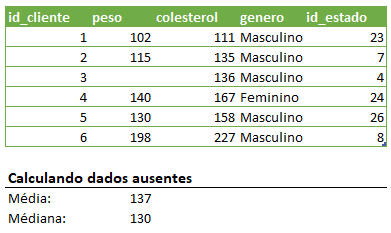

# Corrigindo dados Cliente

In [20]:
peso_mediana = round(clientes.peso.median(), 2)
clientes.peso.fillna(peso_mediana, inplace=True)

In [21]:
clientes.isna().sum()

id_cliente    0
peso          0
colesterol    0
genero        0
id_estado     0
dtype: int64

In [22]:
clientes.count()

id_cliente    547
peso          547
colesterol    547
genero        547
id_estado     547
dtype: int64

Alterando os dados por outras medidas


In [23]:
clientes.describe()

,id_cliente,peso,colesterol,id_estado
count,547.00000,547.000000,547.000000,547.000000
mean,274.00000,143.409506,170.433272,13.833638
std,158.04957,30.697098,39.147189,7.593117
min,1.00000,95.000000,102.000000,1.000000
25%,137.50000,116.000000,136.000000,7.000000
50%,274.00000,140.000000,169.000000,13.000000
75%,410.50000,171.000000,208.000000,20.000000
max,547.00000,203.000000,235.000000,27.000000


In [24]:
# Realizando a média e mediana da variável peso
media = clientes.peso.mean()
mediana = clientes.peso.median()

In [25]:
# verificando valores
print(f"O valor da média dos pesos é:{media}\nO valor da mediana é {mediana}")


O valor da média dos pesos é:143.40950639853747
O valor da mediana é 140.0


In [26]:
# Fazendo arrendondamento da variável média
round(media,2)

143.41

In [27]:
# Verifica se existe algum valor ausente
clientes.isna().sum()

id_cliente    0
peso          0
colesterol    0
genero        0
id_estado     0
dtype: int64

In [28]:
clientes.count()

id_cliente    547
peso          547
colesterol    547
genero        547
id_estado     547
dtype: int64

# Substituindo variável categórica

Quando temos uma variável do tipo categórica, uma abordagem é substituir o valor ausente pela variável mais frequente encontrada no conjunto de dados.

In [29]:
print(estados.pais.value_counts())

Brasil    25
Name: pais, dtype: int64


In [30]:
#estados.pais.fillna('Brasil', inplace=True)

In [31]:
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            0
dtype: int64

# Analisando distribuição dos dados


In [32]:
import matplotlib.pyplot as plt


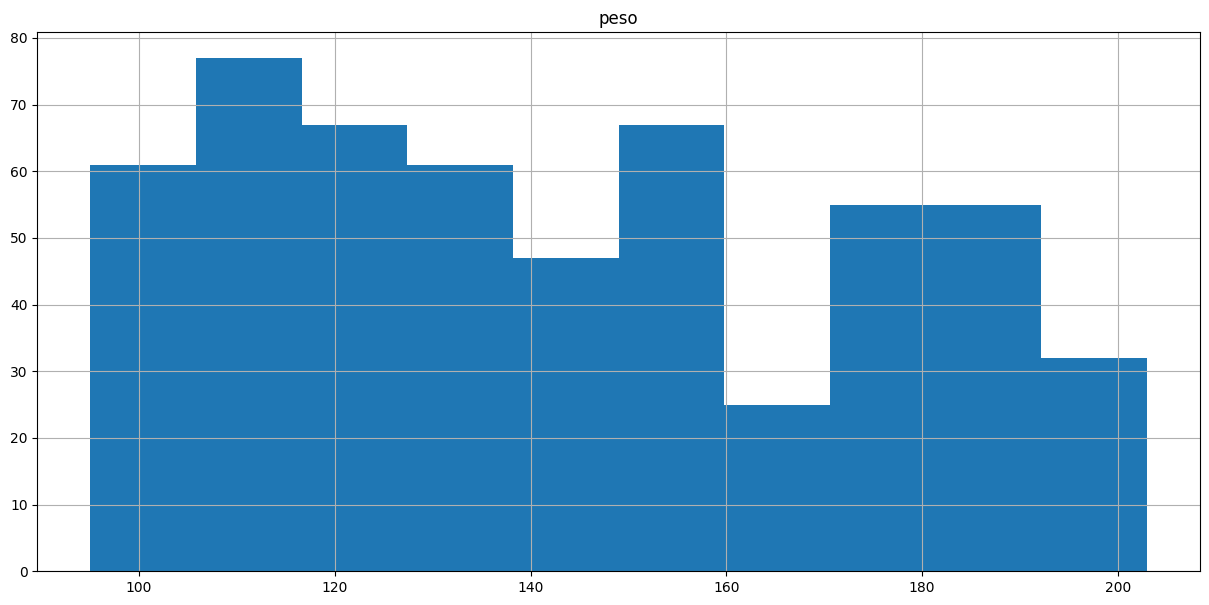

In [33]:
clientes.hist(column='peso', figsize=(15,7))
plt.show()

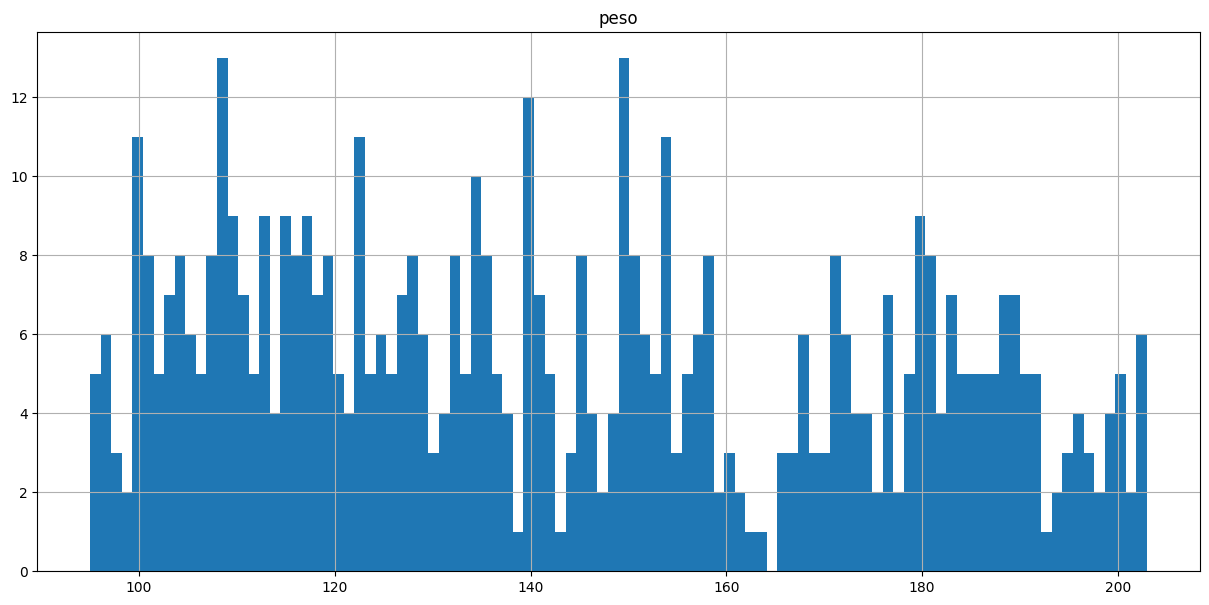

In [34]:
clientes.hist(column='peso', figsize=(15,7), bins=100)
plt.show()

array([[<Axes: title={'center': 'colesterol'}>]], dtype=object)

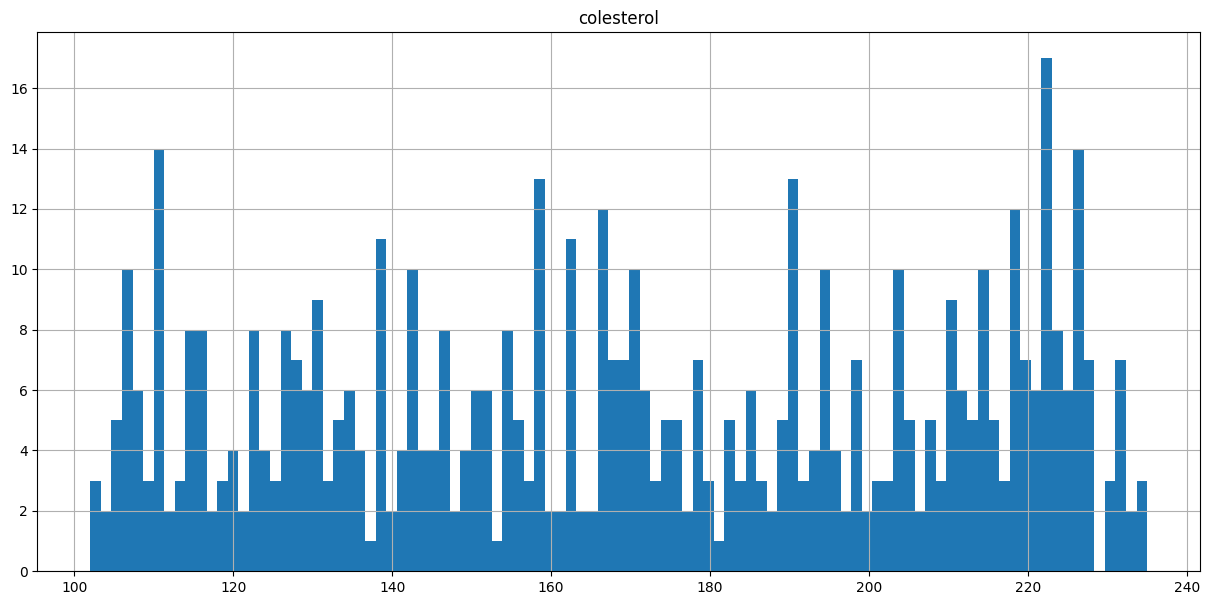

In [35]:
clientes.hist(column='colesterol', figsize=(15,7), bins=100)

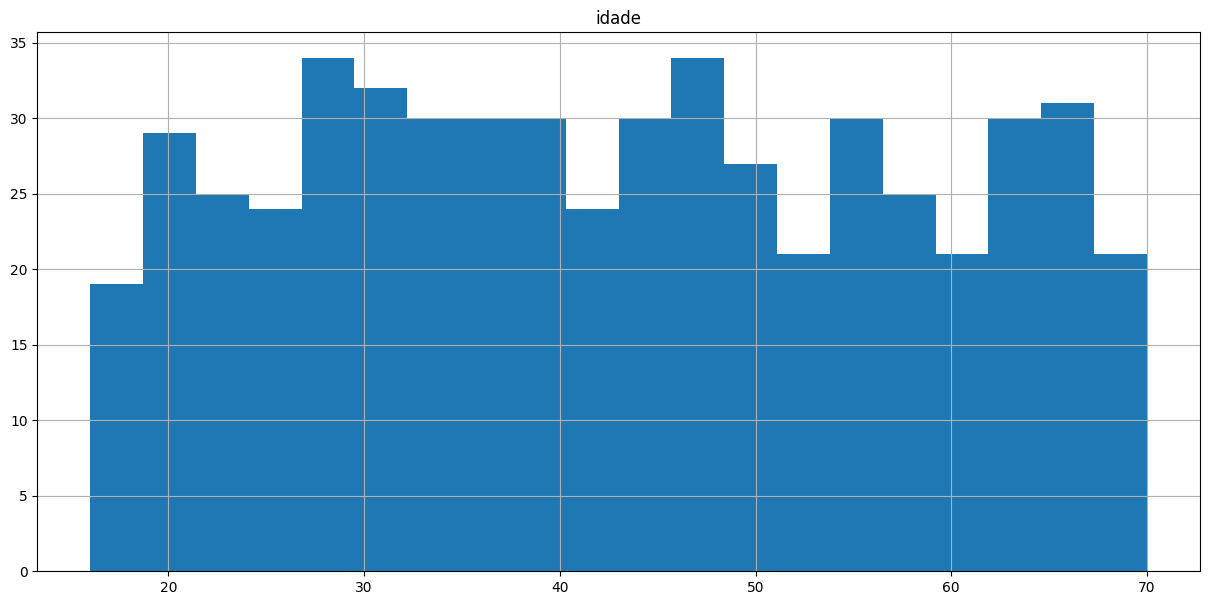

In [36]:
idade.hist(column='idade', figsize=(15,7), bins=20)
plt.show()

In [37]:
#Criando um Identificador para a variável genero
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
clientes['genero_number'] = LE.fit_transform(clientes['genero'])

In [38]:
clientes

,id_cliente,peso,colesterol,genero,id_estado,genero_number
0,1,102.0,111,Masculino,23,1
1,2,115.0,135,Masculino,7,1
2,3,115.0,136,Masculino,4,1
3,4,140.0,167,Feminino,24,0
4,5,130.0,158,Masculino,26,1
...,...,...,...,...,...,...
542,543,172.0,207,Masculino,22,1
543,544,129.0,157,Masculino,1,1
544,545,107.0,115,Masculino,6,1
545,546,117.0,147,Masculino,20,1


array([[<Axes: title={'center': 'genero_number'}>]], dtype=object)

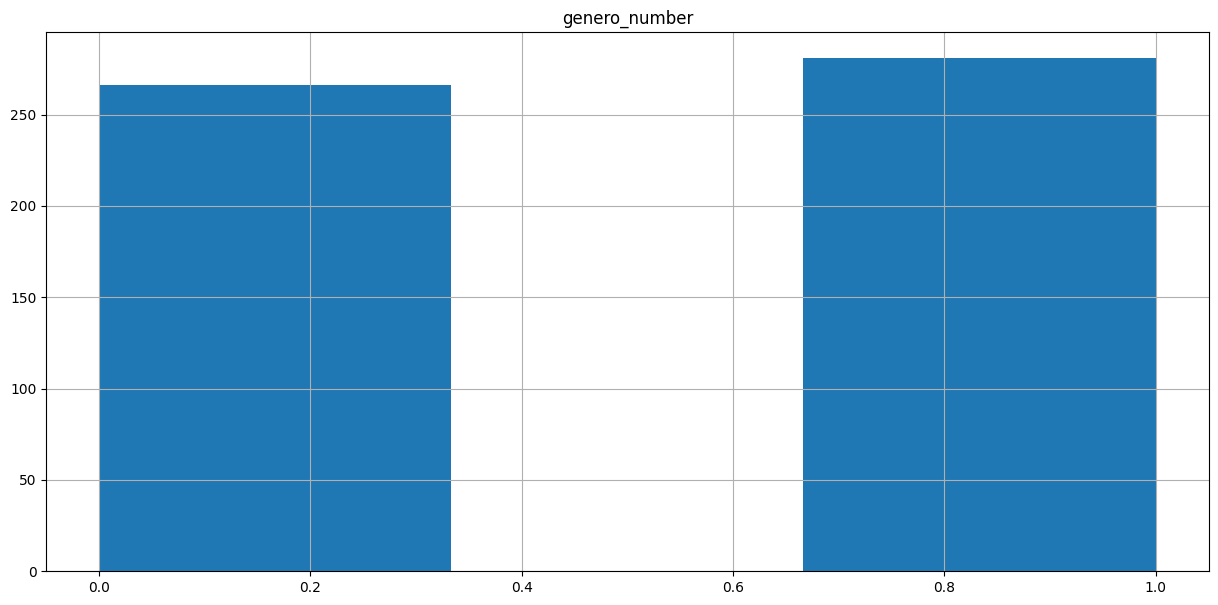

In [39]:
clientes.hist(column='genero_number', figsize=(15,7), bins=3 )

# Junções entre os dados coletados
Nessa etapa vamos realizar o merge entre os dados que realizamos a coleta



In [40]:
estados[:7]

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,Brasil
2,3,Amapá,ap,Brasil
3,4,Amazonas,am,Brasil
4,5,Bahia,ba,Brasil
5,6,Ceará,ce,Brasil
6,7,Distrito Federal,df,Brasil


In [41]:
clientes[:5]

,id_cliente,peso,colesterol,genero,id_estado,genero_number
0,1,102.0,111,Masculino,23,1
1,2,115.0,135,Masculino,7,1
2,3,115.0,136,Masculino,4,1
3,4,140.0,167,Feminino,24,0
4,5,130.0,158,Masculino,26,1


In [42]:
clientes_estados = pd.merge(clientes, estados, on='id_estado')
clientes_estados.sort_values('id_cliente')

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil
18,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil
40,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil
65,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil
84,6,198.0,227,Masculino,8,1,Espírito Santo,es,Brasil
...,...,...,...,...,...,...,...,...,...
421,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil
433,544,129.0,157,Masculino,1,1,Acre,ac,Brasil
156,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil
374,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil


In [43]:
clientes_estados.groupby('id_estado').count()



,id_cliente,peso,colesterol,genero,genero_number,estado,sigla_estado,pais
id_estado,,,,,,,,
1,12,12,12,12,12,12,12,12
2,21,21,21,21,21,21,21,21
3,21,21,21,21,21,21,21,21
4,25,25,25,25,25,25,25,25
5,18,18,18,18,18,18,18,18
6,25,25,25,25,25,25,25,25
7,22,22,22,22,22,22,22,22
8,18,18,18,18,18,18,18,18
9,23,23,23,23,23,23,23,23


In [44]:
#realiza Junção entre clientes e idades
base_completa = pd.merge(clientes_estados, idade, on='id_cliente').sort_values('id_cliente')


In [45]:
base_completa.groupby('id_estado').count()

,id_cliente,peso,colesterol,genero,genero_number,estado,sigla_estado,pais,idade
id_estado,,,,,,,,,
1,12,12,12,12,12,12,12,12,12
2,21,21,21,21,21,21,21,21,21
3,21,21,21,21,21,21,21,21,21
4,25,25,25,25,25,25,25,25,25
5,18,18,18,18,18,18,18,18,18
6,25,25,25,25,25,25,25,25,25
7,22,22,22,22,22,22,22,22,22
8,18,18,18,18,18,18,18,18,18
9,23,23,23,23,23,23,23,23,23


In [46]:
base_completa

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
18,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
40,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
65,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
84,6,198.0,227,Masculino,8,1,Espírito Santo,es,Brasil,17
...,...,...,...,...,...,...,...,...,...,...
421,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil,20
433,544,129.0,157,Masculino,1,1,Acre,ac,Brasil,66
156,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil,36
374,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil,57


In [47]:
base_completa.reset_index(drop=True)

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
1,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
2,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
3,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
4,6,198.0,227,Masculino,8,1,Espírito Santo,es,Brasil,17
...,...,...,...,...,...,...,...,...,...,...
497,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil,20
498,544,129.0,157,Masculino,1,1,Acre,ac,Brasil,66
499,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil,36
500,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil,57


# Organizando a base de dados
Podemos realizar várias alterações na base de dados a fim de melhorar o entendimento e disposição das colunas. Além disso, podemos fazer transformações nos textos das linhas e colunas.

In [48]:
# Alterando nome das colunas
base_completa.rename(columns={'id_cliente': 'cod_cliente', 'genero_number': 'cod_genero'}, inplace = True)
base_completa

,cod_cliente,peso,colesterol,genero,id_estado,cod_genero,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
18,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
40,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
65,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
84,6,198.0,227,Masculino,8,1,Espírito Santo,es,Brasil,17
...,...,...,...,...,...,...,...,...,...,...
421,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil,20
433,544,129.0,157,Masculino,1,1,Acre,ac,Brasil,66
156,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil,36
374,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil,57


In [49]:
# Alterando as linhas da variável sigla_estado 
base_completa.sigla_estado.str.upper()

0      RR
18     DF
40     AM
65     SE
84     ES
       ..
421    RO
433    AC
156    CE
374    RN
101    ES
Name: sigla_estado, Length: 502, dtype: object

In [50]:
# Inserindo alteração realizada
base_completa['sigla_estado'] = base_completa.sigla_estado.str.upper()

In [51]:
base_completa

,cod_cliente,peso,colesterol,genero,id_estado,cod_genero,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,RR,Brasil,17
18,2,115.0,135,Masculino,7,1,Distrito Federal,DF,Brasil,28
40,3,115.0,136,Masculino,4,1,Amazonas,AM,Brasil,62
65,5,130.0,158,Masculino,26,1,Sergipe,SE,Brasil,44
84,6,198.0,227,Masculino,8,1,Espírito Santo,ES,Brasil,17
...,...,...,...,...,...,...,...,...,...,...
421,543,172.0,207,Masculino,22,1,Rondônia,RO,Brasil,20
433,544,129.0,157,Masculino,1,1,Acre,AC,Brasil,66
156,545,107.0,115,Masculino,6,1,Ceará,CE,Brasil,36
374,546,117.0,147,Masculino,20,1,Rio Grande do Norte,RN,Brasil,57


# Alterando disposição das colunas do arquivo de dados
Vamos alterar as disposições das colunas no nosso conjunto de dados a fim de faciliar a visuliazação.

In [52]:
base_completa[['cod_cliente', 'genero', 'idade', 'peso', 'colesterol' ,'id_estado', 'estado', 'sigla_estado', 'pais' ]]

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil
18,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil
40,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil
65,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil
84,6,Masculino,17,198.0,227,8,Espírito Santo,ES,Brasil
...,...,...,...,...,...,...,...,...,...
421,543,Masculino,20,172.0,207,22,Rondônia,RO,Brasil
433,544,Masculino,66,129.0,157,1,Acre,AC,Brasil
156,545,Masculino,36,107.0,115,6,Ceará,CE,Brasil
374,546,Masculino,57,117.0,147,20,Rio Grande do Norte,RN,Brasil


In [53]:
base_completa = base_completa[['cod_cliente','genero', 'idade', 'peso', 'colesterol' ,'id_estado', 'estado', 'sigla_estado', 'pais' ]].reset_index(drop=True)

In [54]:
base_completa

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil
1,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil
2,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil
3,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil
4,6,Masculino,17,198.0,227,8,Espírito Santo,ES,Brasil
...,...,...,...,...,...,...,...,...,...
497,543,Masculino,20,172.0,207,22,Rondônia,RO,Brasil
498,544,Masculino,66,129.0,157,1,Acre,AC,Brasil
499,545,Masculino,36,107.0,115,6,Ceará,CE,Brasil
500,546,Masculino,57,117.0,147,20,Rio Grande do Norte,RN,Brasil


# Análise de dados
É a etapa onde selecionamos os algoritmos de Machine Learning que serão inseridos para alcançar o resultado, levando em consideração o conjunto de dados obtidos na etapa anterior.

Para esse trabalho, vamos realizar um agrupamento de pessoas baseado no colestesterol, peso e idade das pessoas.

#Aplicando método do cotovelo
Vamos iniciar visualizando identificando o número de clusters necessário para realizar o agrupamento

In [55]:
from sklearn.cluster import KMeans

In [56]:
def calcular_wcss(dados_cliente):
    wcss = []
    for k in range(1,11):
        kmeans = KMeans(n_clusters = k, random_state=0, init='k-means++')
        kmeans.fit(X=dados_cliente)        
        wcss.append(kmeans.inertia_)
    return wcss

In [57]:
#dados_cliente = base_completa[['peso', 'colesterol','idade']]
dados_cliente = base_completa[['idade', 'colesterol']]
dados_cliente.head()

,idade,colesterol
0,17,111
1,28,135
2,62,136
3,44,158
4,17,227


In [58]:
wcss_clientes = calcular_wcss(dados_cliente)

/home/marcelo/anaconda3/envs/conda_env3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/home/marcelo/anaconda3/envs/conda_env3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/marcelo/anaconda3/envs/conda_env3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/marcelo/anaconda3/envs/conda_env3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/marcelo/anaconda3/envs/conda_env3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

In [59]:
type(wcss_clientes)

list

In [60]:
# Visualizando os dados obtidos do WCSS
for i in range(len(wcss_clientes)):
  print(f'O cluster {i} possui valor de WCSS de: {wcss_clientes[i]}')

O cluster 0 possui valor de WCSS de: 886008.5278884462
O cluster 1 possui valor de WCSS de: 298723.8203918204
O cluster 2 possui valor de WCSS de: 190056.2896610351
O cluster 3 possui valor de WCSS de: 156456.51733630296
O cluster 4 possui valor de WCSS de: 128842.54732144276
O cluster 5 possui valor de WCSS de: 103586.83318736043
O cluster 6 possui valor de WCSS de: 83841.28741226862
O cluster 7 possui valor de WCSS de: 70546.88514466138
O cluster 8 possui valor de WCSS de: 60490.48191996521
O cluster 9 possui valor de WCSS de: 53597.2292338864


# Visualizando o gráfico do cotovelo

In [61]:
import plotly.express as px  #Criação de graficos dinâmnicos
import plotly.offline as py
import plotly.graph_objects as go #Para criação e concatenização de graficos

In [62]:
grafico_wcss = px.line( x= range(1,11),
                        y=wcss_clientes
                       )
fig = go.Figure(grafico_wcss)

fig.update_layout(title='Calculando o WCSS',
                  xaxis_title= 'Número de clusters',
                  yaxis_title= 'Valor do Wcss', 
                  template =  'plotly_white'
                  ) 

fig.show()



In [63]:
kmeans_clientes = KMeans(n_clusters=3, random_state=0, init='k-means++')
base_completa['cluster'] = kmeans_clientes.fit_predict(dados_cliente)

/home/marcelo/anaconda3/envs/conda_env3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [64]:
base_completa

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil,1
1,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil,1
2,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil,1
3,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil,0
4,6,Masculino,17,198.0,227,8,Espírito Santo,ES,Brasil,2
...,...,...,...,...,...,...,...,...,...,...
497,543,Masculino,20,172.0,207,22,Rondônia,RO,Brasil,2
498,544,Masculino,66,129.0,157,1,Acre,AC,Brasil,0
499,545,Masculino,36,107.0,115,6,Ceará,CE,Brasil,1
500,546,Masculino,57,117.0,147,20,Rio Grande do Norte,RN,Brasil,1


# Calcula os centroides de cada cluster

In [65]:
centroides_clusters = kmeans_clientes.cluster_centers_
centroides_clusters

array([[ 41.69375   , 169.7       ],
       [ 43.67664671, 124.75449102],
       [ 43.34285714, 214.96571429]])

In [66]:
dados_cliente

,idade,colesterol
0,17,111
1,28,135
2,62,136
3,44,158
4,17,227
...,...,...
497,20,207
498,66,157
499,36,115
500,57,147


Aqui temos os centroides dos 3 cluster de acordo com os atributos. 
Nesse exemplo vemos os centroides de 'peso', 'colesterol','idade' respectivamente.

In [67]:
grafico = px.scatter(x = base_completa['idade'], 
                            y = base_completa['colesterol'], 
                            color= base_completa['cluster'])

grafico_centroide = px.scatter(x = centroides_clusters[:,0], y = centroides_clusters[:,1], size = [4,4,4])
grafico_final_petala = go.Figure(data = grafico.data + grafico_centroide.data)
grafico_final_petala.show()

# Visualizando e alterando layout do gráfico

In [68]:
grafico = px.scatter(x = base_completa['colesterol'], 
                     y = base_completa['peso'], 
                     color= base_completa['cluster'])
fig = go.Figure(grafico)

fig.update_layout(title='Análise de Clusters',
                  xaxis_title= 'Colesterol',
                  yaxis_title= 'peso',                  
                  ) 


fig.show()

# Criando Função para Gerar gráficos

In [69]:
def plotar_grafico(x,y, xlabel, y_label):
  grafico = px.scatter(x = x, 
                      y = y, 
                      color= base_completa['cluster'])
  
  fig = go.Figure(grafico)

  fig.update_layout(title='Análise de Clusters',
                    xaxis_title= xlabel,
                    yaxis_title= y_label,                  
                    ) 

  fig.show()

In [70]:
plotar_grafico(base_completa['colesterol'], base_completa['peso'], 'colesterol', 'peso')

In [71]:
plotar_grafico(base_completa['peso'], base_completa['colesterol'], 'peso', 'colesterol')

In [72]:
plotar_grafico(base_completa['idade'], base_completa['colesterol'], 'idade', 'colesterol')

# Segmentando os clientes baseado na análise dos clusters

Agora vamos analisar os dados dos clusters referente aos atributos peso e colesterol e atribuir nomes que representam aquele agrupamento.

Vamos agrupar  em 3 tipos:


Alto risco: Peso e colesterol altos

Baixo risco: Baixo peso e colesterol baixo

Moderado risco: peso e colesterol medianos




In [73]:
x = 'colesterol'
y = 'peso'

plotar_grafico(base_completa[x], base_completa[y], x, y)


In [74]:
cluster_clientes = base_completa

In [75]:
# Seguimentando os clientes baseado na análise dos clusters
cluster_clientes.loc[cluster_clientes['cluster']==2,'nome_cluster'] = 'Alto Risco'
cluster_clientes.loc[cluster_clientes['cluster']==1,'nome_cluster'] = 'Baixo Risco'
cluster_clientes.loc[cluster_clientes['cluster']==0,'nome_cluster'] = 'Risco Moderado'

In [76]:
cluster_clientes

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster,nome_cluster
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil,1,Baixo Risco
1,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil,1,Baixo Risco
2,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil,1,Baixo Risco
3,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil,0,Risco Moderado
4,6,Masculino,17,198.0,227,8,Espírito Santo,ES,Brasil,2,Alto Risco
...,...,...,...,...,...,...,...,...,...,...,...
497,543,Masculino,20,172.0,207,22,Rondônia,RO,Brasil,2,Alto Risco
498,544,Masculino,66,129.0,157,1,Acre,AC,Brasil,0,Risco Moderado
499,545,Masculino,36,107.0,115,6,Ceará,CE,Brasil,1,Baixo Risco
500,546,Masculino,57,117.0,147,20,Rio Grande do Norte,RN,Brasil,1,Baixo Risco


# Análises dos clusters criados

<Axes: title={'center': 'idade'}, ylabel='nome_cluster'>

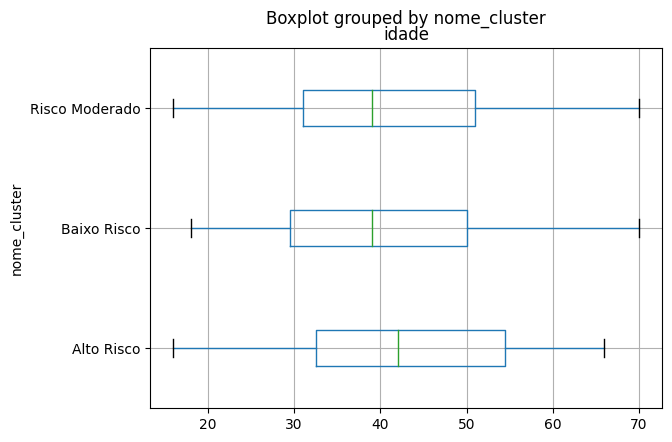

In [77]:
cc_feminino = cluster_clientes[cluster_clientes['genero'] == 'Feminino']
cc_feminino.boxplot(column='idade', by='nome_cluster', vert=False)

In [78]:
# Verifica os valores de idade por cluster
cluster_clientes.groupby('nome_cluster')['idade'].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Alto Risco,175.0,43.342857,15.167537,16.0,31.5,43.0,56.0,70.0
Baixo Risco,167.0,43.676647,14.992476,17.0,31.0,43.0,57.5,70.0
Risco Moderado,160.0,41.693750,14.933815,16.0,29.0,41.0,53.0,70.0


In [79]:
# Verifica os valores de idade por cluster
cluster_clientes.groupby('nome_cluster')['peso'].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Alto Risco,175.0,179.605714,13.426641,140.0,171.0,181.0,189.5,203.0
Baixo Risco,167.0,109.856287,8.023516,95.0,103.0,110.0,116.0,140.0
Risco Moderado,160.0,139.562500,10.111136,123.0,131.0,140.0,149.0,158.0


In [80]:
# Verifica os valores de estado por cluster
cluster_clientes.groupby('nome_cluster')['estado'].describe()

,count,unique,top,freq
nome_cluster,,,,
Alto Risco,175,25,Distrito Federal,11
Baixo Risco,167,25,Amazonas,13
Risco Moderado,160,25,Mato Grosso do Sul,11


In [81]:
cluster_clientes.query('nome_cluster == "Alto Risco" & estado == "Mato Grosso"')

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster,nome_cluster
104,112,Masculino,66,179.0,214,11,Mato Grosso,MT,Brasil,2,Alto Risco
144,155,Masculino,16,167.0,204,11,Mato Grosso,MT,Brasil,2,Alto Risco
148,160,Masculino,23,171.0,212,11,Mato Grosso,MT,Brasil,2,Alto Risco
153,168,Masculino,34,184.0,222,11,Mato Grosso,MT,Brasil,2,Alto Risco
157,172,Feminino,61,161.0,201,11,Mato Grosso,MT,Brasil,2,Alto Risco
181,198,Masculino,28,173.0,211,11,Mato Grosso,MT,Brasil,2,Alto Risco
208,227,Masculino,35,184.0,220,11,Mato Grosso,MT,Brasil,2,Alto Risco
227,248,Masculino,28,171.0,204,11,Mato Grosso,MT,Brasil,2,Alto Risco
333,361,Feminino,34,180.0,218,11,Mato Grosso,MT,Brasil,2,Alto Risco
474,518,Feminino,19,172.0,210,11,Mato Grosso,MT,Brasil,2,Alto Risco


In [82]:
cluster_clientes.groupby(['nome_cluster', 'genero'])['peso'].describe()

count        mean        std    min    25%    50%  \
nome_cluster   genero                                                         
Alto Risco     Feminino    79.0  179.569620  13.586082  154.0  169.5  182.0   
               Masculino   96.0  179.635417  13.365407  140.0  171.0  180.0   
Baixo Risco    Feminino    71.0  110.591549   7.918473   96.0  107.0  111.0   
               Masculino   96.0  109.312500   8.098489   95.0  103.0  107.5   
Risco Moderado Feminino    91.0  139.241758  10.072339  123.0  131.5  139.0   
               Masculino   69.0  139.985507  10.220356  123.0  131.0  140.0   

                            75%    max  
nome_cluster   genero                   
Alto Risco     Feminino   190.5  203.0  
               Masculino  188.0  203.0  
Baixo Risco    Feminino   116.0  140.0  
               Masculino  117.0  126.0  
Risco Moderado Feminino   145.5  158.0  
               Masculino  150.0  155.0

In [83]:
cluster_clientes.\
    where(cluster_clientes['nome_cluster'] == 'Risco Moderado').\
    groupby(['nome_cluster', 'estado'])['peso'].\
    describe().\
    sort_values(by='count', ascending=False)

count        mean        std    min  \
nome_cluster   estado                                                     
Risco Moderado Goiás                 11.0  138.000000   6.942622  127.0   
               Mato Grosso do Sul    11.0  137.727273  11.064275  123.0   
               Minas Gerais          10.0  137.900000  10.202941  126.0   
               Roraima               10.0  135.400000  10.469002  124.0   
               Espírito Santo         9.0  141.444444   9.773831  124.0   
               Ceará                  8.0  142.250000   5.574175  137.0   
               Rondônia               8.0  141.625000  11.262295  125.0   
               Rio Grande do Sul      8.0  142.625000   7.614601  131.0   
               Pernambuco             7.0  147.000000   9.678154  128.0   
               Sergipe                7.0  136.285714  10.734901  126.0   
               Bahia                  7.0  137.571429   8.753231  129.0   
               Maranhão               6.0  133.000000   7.155418  124.0   
               Alagoas                6.0  134.333333  12.596296  123.0   
               Pará                   6.0  137.000000  11.966620  128.0   
               Rio de Janeiro         5.0  141.600000  14.240786  128.0   
               Rio Grande do Norte    5.0  141.400000  11.238327  127.0   
               Acre                   5.0  141.200000  12.132601  128.0   
               Paraná                 5.0  144.600000  10.014989  133.0   
               Tocantins              5.0  138.400000  11.436783  124.0   
               Amazonas               4.0  146.250000  11.586630  129.0   
               Amapá                  4.0  135.250000  12.038134  124.0   
               São Paulo              4.0  141.000000  11.775681  125.0   
               Paraíba                3.0  145.666667  10.408330  134.0   
               Mato Grosso            3.0  142.666667   7.371115  137.0   
               Distrito Federal       3.0  138.666667  15.143756  128.0   

                                       25%    50%     75%    max  
nome_cluster   estado                                             
Risco Moderado Goiás                133.50  135.0  144.00  148.0  
               Mato Grosso do Sul   127.50  140.0  144.50  155.0  
               Minas Gerais         128.75  136.0  146.75  154.0  
               Roraima              125.50  133.5  144.50  151.0  
               Espírito Santo       134.00  141.0  149.00  154.0  
               Ceará                138.50  141.0  143.50  153.0  
               Rondônia             131.75  143.0  151.75  154.0  
               Rio Grande do Sul    137.00  144.0  150.00  150.0  
               Pernambuco           143.50  152.0  154.00  154.0  
               Sergipe              130.00  132.0  139.00  158.0  
               Bahia                131.50  133.0  142.50  153.0  
               Maranhão             128.25  132.0  138.75  142.0  
               Alagoas              126.25  128.5  142.00  154.0  
               Pará                 128.25  131.5  143.00  157.0  
               Rio de Janeiro       132.00  134.0  156.00  158.0  
               Rio Grande do Norte  132.00  147.0  148.00  153.0  
               Acre                 129.00  145.0  149.00  155.0  
               Paraná               137.00  145.0  150.00  158.0  
               Tocantins            132.00  136.0  150.00  150.0  
               Amazonas             145.50  151.0  151.75  154.0  
               Amapá                127.00  133.0  141.25  151.0  
               São Paulo            137.00  143.0  147.00  153.0  
               Paraíba              141.50  149.0  151.50  154.0  
               Mato Grosso          138.50  140.0  145.50  151.0  
               Distrito Federal     130.00  132.0  144.00  156.0

In [84]:
cluster_clientes.\
    groupby(['estado'])['colesterol'].\
    describe().\
    sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
estado,,,,,,,,
Mato Grosso,18.0,186.333333,34.610437,109.0,166.50,202.5,211.75,222.0
Rio Grande do Sul,21.0,185.380952,34.110814,108.0,168.00,185.0,215.00,224.0
Pernambuco,17.0,180.176471,42.043482,102.0,155.00,187.0,215.00,234.0
Espírito Santo,18.0,179.111111,38.018399,105.0,165.00,180.0,217.50,227.0
Pará,21.0,178.952381,40.092987,106.0,151.00,191.0,213.00,227.0
São Paulo,12.0,176.666667,37.582233,114.0,148.50,182.0,209.50,222.0
Distrito Federal,22.0,175.954545,42.539032,110.0,133.50,194.0,211.75,231.0
Alagoas,21.0,174.666667,42.046799,106.0,139.00,181.0,214.00,228.0
Tocantins,19.0,174.263158,37.716548,110.0,146.00,178.0,200.00,233.0


array([[<Axes: title={'center': 'peso'}>]], dtype=object)

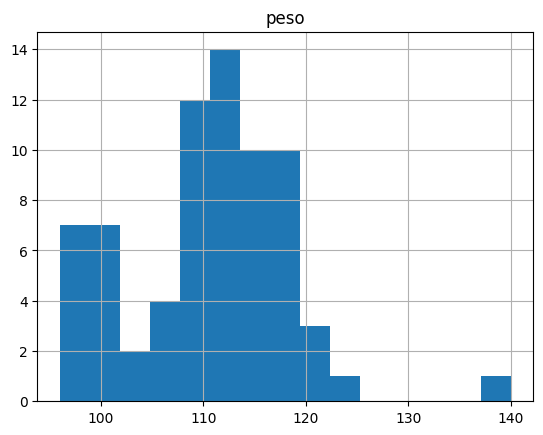

In [85]:
cc_f_hist = \
cluster_clientes.loc[(cluster_clientes['nome_cluster'] == 'Baixo Risco') & (cluster_clientes['genero'] == 'Feminino')]
cc_f_hist.hist(column='peso', bins=15)

# Exportando dados 

In [86]:
cluster_clientes.to_csv('../Desafio/classificacao_clientes.csv', sep = ';', encoding='latin1') 

OSError: Cannot save file into a non-existent directory: '../Desafio'